## Examining Cloudiness Across the Gulf Stream

Initially a figure for prelims

In [1]:
import numpy as np
import xarray as xr
import rioxarray
import os.path as op
import xrft
from matplotlib import colors, ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#hycom = xr.open_rasterio('hycom_gs_img.tif')
#modis = xr.open_rasterio('stacked_sst-0000000000-0000000000.tif')
modis_sst = xr.open_rasterio('stacked_sst_171819.tif')
modis_chl = xr.open_rasterio('stacked_chl_171819.tif')

In [3]:
modis_sst = modis_sst.sel(band=slice(1,1050))
modis_chl = modis_chl.sel(band=slice(1,1050))

modis_sst_subset = modis_sst.sel(x=slice(-75,-66))
modis_chl_subset = modis_chl.sel(x=slice(-75,-66))

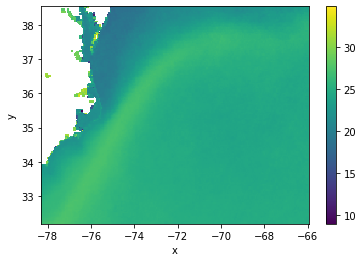

In [4]:
modis_sst.mean(dim='band').plot()

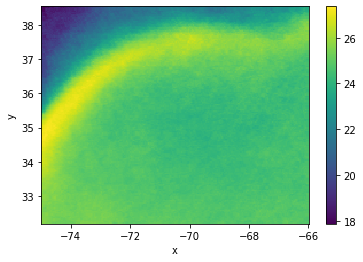

In [5]:
modis_sst_subset = modis_sst.sel(x=slice(-75,-66), band=slice(1,1000))
modis_sst_subset.mean(dim='band').plot()

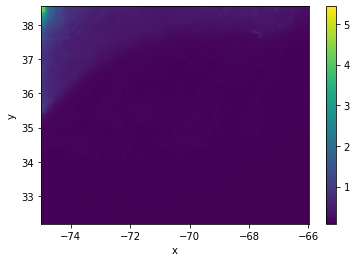

In [6]:
modis_chl_subset = modis_chl.sel(x=slice(-75,-66), band=slice(1,1000))
modis_chl_subset.mean(dim='band').plot()

In [7]:
modis_sst_subset.shape

(1000, 177, 251)

In [8]:
X = np.array(modis_sst_subset).reshape(1000,177*251)
X = np.nanmean(X.reshape(-1, 200, 177*251), axis=1)
np.count_nonzero(np.isnan(X))

0

In [9]:
Xc = np.array(modis_chl_subset).reshape(1000,177*251)
Xc = np.nanmean(Xc.reshape(-1, 200, 177*251), axis=1)
np.count_nonzero(np.isnan(Xc))

0

In [10]:
Xc.shape, X.shape

((5, 44427), (5, 44427))

In [11]:
Xsc = np.concatenate((Xc, X), axis=0)

In [12]:
count_modis_sst = np.count_nonzero(~np.isnan(modis_sst_subset), axis=0)
count_modis_sst_full = np.count_nonzero(~np.isnan(modis_sst), axis=0)
time_count_modis_sst = np.count_nonzero(~np.isnan(modis_sst_subset), axis=(1,2))

count_modis_chl = np.count_nonzero(~np.isnan(modis_chl_subset), axis=0)
count_modis_chl_full = np.count_nonzero(~np.isnan(modis_chl), axis=0)
time_count_modis_chl = np.count_nonzero(~np.isnan(modis_chl_subset), axis=(1,2))

(array([  13.,   65.,  137.,  263.,  355.,  699.,  874., 1153., 1162.,
        1355., 1491., 1283., 1348., 1472., 1718., 1443., 1489., 1575.,
        1998., 1765., 1625., 1851., 1639., 1613., 1581., 1914., 1540.,
        1656., 1856., 2015., 1490., 1149.,  960.,  658.,  538.,  383.,
         228.,   57.,   13.,    3.]),
 array([127.   , 133.275, 139.55 , 145.825, 152.1  , 158.375, 164.65 ,
        170.925, 177.2  , 183.475, 189.75 , 196.025, 202.3  , 208.575,
        214.85 , 221.125, 227.4  , 233.675, 239.95 , 246.225, 252.5  ,
        258.775, 265.05 , 271.325, 277.6  , 283.875, 290.15 , 296.425,
        302.7  , 308.975, 315.25 , 321.525, 327.8  , 334.075, 340.35 ,
        346.625, 352.9  , 359.175, 365.45 , 371.725, 378.   ]),
 <BarContainer object of 40 artists>)

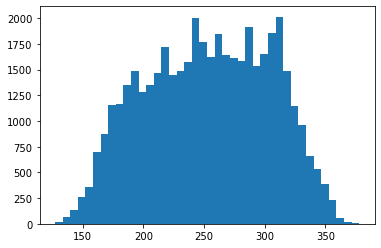

In [13]:
plt.hist(count_modis_sst.flatten(), bins=40)

(array([   7.,  109.,  528., 1235., 1807., 1950., 2043., 2115., 2347.,
        2662., 3097., 3435., 3883., 4427., 4227., 3108., 1743.,  755.,
         420.,  309.,  233.,  237.,  214.,  238.,  236.,  267.,  227.,
         186.,  213.,  210.,  285.,  271.,  240.,  246.,  275.,  223.,
         164.,  141.,   93.,   21.]),
 array([ 50.,  57.,  64.,  71.,  78.,  85.,  92.,  99., 106., 113., 120.,
        127., 134., 141., 148., 155., 162., 169., 176., 183., 190., 197.,
        204., 211., 218., 225., 232., 239., 246., 253., 260., 267., 274.,
        281., 288., 295., 302., 309., 316., 323., 330.]),
 <BarContainer object of 40 artists>)

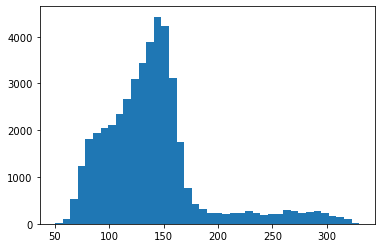

In [14]:
plt.hist(count_modis_chl.flatten(), bins=40)

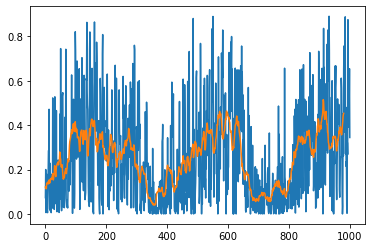

In [15]:
total_sst_pix = modis_sst_subset.shape[1] * modis_sst_subset.shape[2]
plt.plot(time_count_modis_sst/total_sst_pix)
N=21
running_avg_sst = np.convolve(time_count_modis_sst/total_sst_pix, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_sst)

In [16]:
running_avg_sst.shape, time_count_modis_sst.shape

((980,), (1000,))

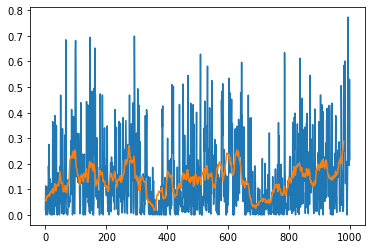

In [17]:
total_chl_pix = modis_chl_subset.shape[1] * modis_chl_subset.shape[2]
plt.plot(time_count_modis_chl/total_chl_pix)
N=21
running_avg_chl = np.convolve(time_count_modis_chl/total_chl_pix, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_chl)

In [18]:
running_avg_chl.shape

(980,)

In [ ]:
modis_sst[0,:,:] = count_modis_sst_full
modis_chl[0,:,:] = count_modis_chl_full

In [ ]:
import matplotlib.dates as mdates
import datetime as dt

N = 1050
now = dt.datetime.strptime('Jan 1 2017', '%b %d %Y')
then = now + dt.timedelta(days=N)
days = mdates.drange(now,then,dt.timedelta(days=1))

N = 1030
now = dt.datetime.strptime('Jan 1 2017', '%b %d %Y')
then = now + dt.timedelta(days=N)
days_avg = mdates.drange(now,then,dt.timedelta(days=1))

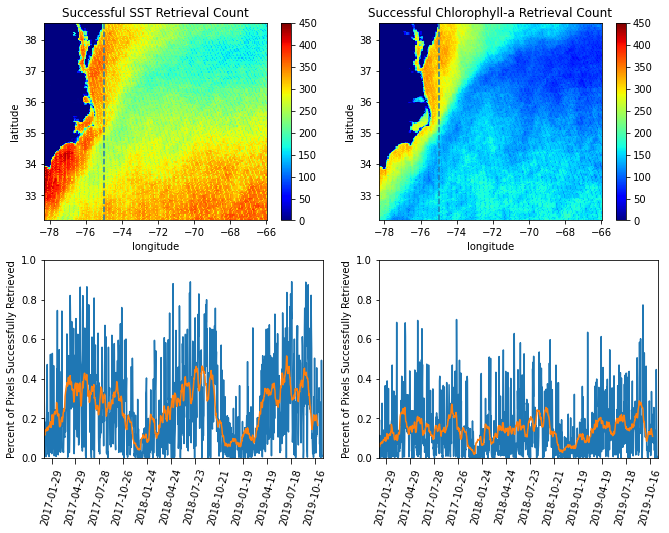

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,8))

#modis_sst[0].plot(ax=ax[0], cmap='cividis', vmin=0, vmax=250)
modis_sst[0].plot(ax=ax[0,0], cmap='jet', vmin=0, vmax=450)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].set_title('Successful SST Retrieval Count')
ax[0,0].axvline(x=-75, linestyle='--')

ax[1,0].set_ylim(0,1)
ax[1,0].set_ylabel('Percent of Pixels Successfully Retrieved')
ax[1,0].plot(days, time_count_modis_sst/total_sst_pix)
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1,0].xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax[1,0].plot(days_avg,running_avg_sst)
ax[1,0].tick_params('x', labelrotation=75, length=6)
ax[1,0].set_xlim(days[0], days[-1])

modis_chl[0].plot(ax=ax[0,1], cmap='jet', vmin=0, vmax=450)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].set_title('Successful Chlorophyll-a Retrieval Count')
ax[0,1].axvline(x=-75, linestyle='--')

ax[1,1].set_ylim(0,1)
ax[1,1].set_ylabel('Percent of Pixels Successfully Retrieved')
ax[1,1].plot(days, time_count_modis_chl/total_chl_pix)
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1,1].xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax[1,1].plot(days_avg,running_avg_chl)
ax[1,1].tick_params('x', labelrotation=75, length=6)
ax[1,1].set_xlim(days[0], days[-1])

plt.savefig('modis_cloudiness', dpi=600, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight')

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(8.0, 35.0)

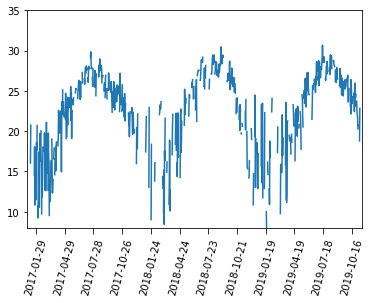

In [ ]:
modis_sst_subset = modis_sst.sel(x=slice(-76.5,-74), y=slice(36.8, 34.5), band=slice(1,1050))
sst_avg = np.mean(modis_sst_subset, axis=(1,2))
sst_avg[np.count_nonzero(~np.isnan(modis_sst_subset),axis=(1,2)) < 250] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, sst_avg)
ax.set_ylim(8,35)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


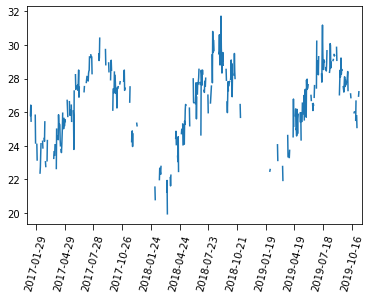

In [ ]:
modis_sst_subset = modis_sst.sel(x=slice(-75,-74.5), y=slice(34.5, 34), band=slice(1,1050))
sst_avg = np.mean(modis_sst_subset, axis=(1,2))
sst_avg[np.count_nonzero(~np.isnan(modis_sst_subset),axis=(1,2)) < 10] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, sst_avg)
#ax.set_ylim(10,30)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(0.0, 1.0)

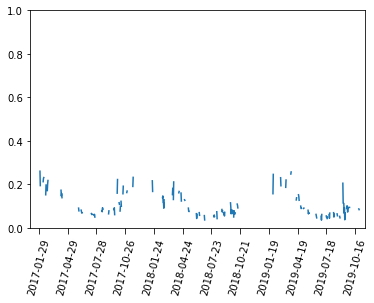

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-75,-74.5), y=slice(34.5, 34), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(1,2))
chl_avg[np.count_nonzero(~np.isnan(modis_chl_subset),axis=(1,2)) < 5] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, chl_avg)
ax.set_ylim(0,1)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(0.0, 5.0)

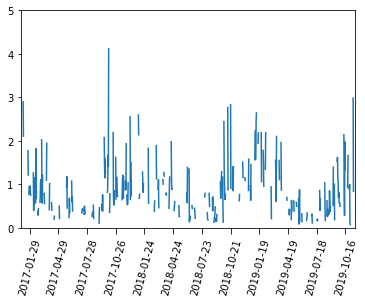

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-75.5,-75), y=slice(35.3, 34.8), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(1,2))
chl_avg[np.count_nonzero(~np.isnan(modis_chl_subset),axis=(1,2)) < 10] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, chl_avg)
ax.set_ylim(0,5)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(0.0, 8.0)

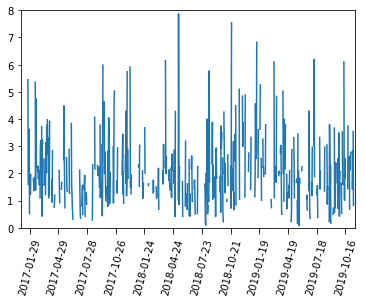

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-76.5,-74), y=slice(36.8, 34.5), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(1,2))
chl_avg[np.count_nonzero(~np.isnan(modis_chl_subset),axis=(1,2)) < 250] = np.nan

fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=90))
ax.tick_params('x', labelrotation=75, length=6)
ax.set_xlim(days[0], days[-1])

ax.plot(days, chl_avg)
ax.set_ylim(0,8)

### Surface plot of lat, llon, slope of chl-sst line, and STD or mean chl concentration

In [ ]:
latitude, longitude,

slope of chl-sst line

In [ ]:
modis_sst_subset = modis_sst.sel(x=slice(-75.45,-74), y=slice(36.8, 34.5), band=slice(1,1050))
sst_avg = np.mean(modis_sst_subset, axis=(0))
np.count_nonzero(~np.isnan(sst_avg)), (sst_avg.shape[0]*sst_avg.shape[1])

(2560, 2560)

In [ ]:
modis_chl_subset = modis_chl.sel(x=slice(-75.45,-74), y=slice(36.8, 34.5), band=slice(1,1050))
chl_avg = np.mean(modis_chl_subset, axis=(0))
np.count_nonzero(~np.isnan(chl_avg)), (chl_avg.shape[0]*chl_avg.shape[1])

(2560, 2560)

In [ ]:
a = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
b = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]
from scipy.stats import linregress
linregress(a, b)

LinregressResult(slope=0.20833333333333331, intercept=13.375, rvalue=0.14499815458068518, pvalue=0.689401448116695, stderr=0.5026170462708364)

In [ ]:
for band in modis_chl_subset:
  print(band)
  break

<xarray.DataArray (y: 64, x: 40)>
array([[2.30549 , 1.811408, 1.627509, ...,      nan,      nan,      nan],
       [2.030221, 1.553621, 1.401825, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
    band     int64 1
  * y        (y) float64 36.77 36.73 36.69 36.66 ... 34.61 34.57 34.54 34.5
  * x        (x) float64 -75.42 -75.38 -75.35 -75.31 ... -74.09 -74.05 -74.02
Attributes:
    transform:      (0.035932610856930364, 0.0, -78.31071636173886, 0.0, -0.0...
    crs:            +init=epsg:4326
    res:            (0.035932610856930364, 0.03593261187263137)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    

In [ ]:
from scipy import stats

slope_arrays = []

all pixels  

for chl, sst in zip(modis_chl_subset, modis_sst_subset):
  mask = ~np.isnan(chl) & ~np.isnan(sst)
  print(chl.shape)
  print(mask.shape)
  slope, intercept, r_value, p_value, std_err = stats.linregress(chl[mask], sst[mask])
  slope_arrays.append(slope)

(64, 40)
(64, 40)


IndexError: ignored

In [ ]:
import plotly.graph_objects as go

# Read data from a csv
X = sst_avg.x
Y = sst_avg.y
z_data = np.array(sst_avg)

fig = go.Figure(data=[go.Surface(z=z_data, x=X, y=Y, surfacecolor=z_data**2)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=400, height=400,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
np.nanmin(Z)

8.965